# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [3]:
!wget https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0 -O housing_market.csv

--2022-04-17 17:51:19--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando-se a www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: /s/raw/0bl91ufgvfarhjh/housing_market.csv [redirecionando]
--2022-04-17 17:51:20--  https://www.dropbox.com/s/raw/0bl91ufgvfarhjh/housing_market.csv
Reaproveitando a conexão existente para [www.dropbox.com]:443.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://uc405e154dd4e51d1f6e1b9b764d.dl.dropboxusercontent.com/cd/0/inline/BjniTV_WElJEE631pK6sFjnOJUeMWgAWHY1ajVd9OfS7bCs2zef1V6q588MhS7-nqKVg9u6SgCHywUJp-E_rYtC3UdmdYhXcv42FASL7edOegrZbmaAs5tBM55Eh0cDp_PeHskgCBRvLrzO_DSXKTmUPHc1BQ5P7GTlhFmG11IIgFA/file# [redirecionando]
--2022-04-17

In [2]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [3]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [9]:
# Calcular dados faltantes(NaN) por coluna
columns                 = df.columns.values
columns_nan_porcentages = {}
columns_length          = len(df.values)

np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})

for col in columns:
    column_nan_count             = df[col].isnull().sum()
    columns_nan_porcentages[col] = column_nan_count / columns_length * 100

columns_nan_porcentages = dict(sorted(columns_nan_porcentages.items(), key=lambda item: item[1], reverse=True))

for key, value in columns_nan_porcentages.items():
    print(f'column: {key} \t porcentage: {value:.2f}%')

# Calcular dados faltantes totais
total_count_nan = df.isnull().sum().sum()
total_nan_porcentage = (total_count_nan / df.size)*100
print(f'total nan porcentage: {total_nan_porcentage}%')
       

column: hospital_beds_raion 	 porcentage: 47.39%
column: build_year 	 porcentage: 44.65%
column: state 	 porcentage: 44.50%
column: cafe_sum_500_min_price_avg 	 porcentage: 43.59%
column: cafe_sum_500_max_price_avg 	 porcentage: 43.59%
column: cafe_avg_price_500 	 porcentage: 43.59%
column: max_floor 	 porcentage: 31.41%
column: material 	 porcentage: 31.41%
column: num_room 	 porcentage: 31.41%
column: kitch_sq 	 porcentage: 31.41%
column: preschool_quota 	 porcentage: 21.95%
column: school_quota 	 porcentage: 21.94%
column: cafe_sum_1000_min_price_avg 	 porcentage: 21.41%
column: cafe_sum_1000_max_price_avg 	 porcentage: 21.41%
column: cafe_avg_price_1000 	 porcentage: 21.41%
column: life_sq 	 porcentage: 20.95%
column: raion_build_count_with_material_info 	 porcentage: 16.38%
column: build_count_block 	 porcentage: 16.38%
column: build_count_wood 	 porcentage: 16.38%
column: build_count_frame 	 porcentage: 16.38%
column: build_count_brick 	 porcentage: 16.38%
column: build_count_mon

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [10]:
"""
Caso a coluna tenha uma porcetagens de dados faltantes maior que 10%, essa coluna é retirada da base de dados,
pois não é possível garantir que a inserção de dados nessa coluna não irá criar um víes na base de dados. O restante
dos dados que tem uma porcentagem menor que 10% e maior que 0%
"""

import statistics as st

new_df = df.copy()

for col in columns:
    if columns_nan_porcentages[col] > 10:
        new_df.drop(col, axis=1, inplace=True)
    elif columns_nan_porcentages[col] > 0:
        if col in numeric_cols:
            col_mean = new_df[col].mean()
            new_df[col].fillna(col_mean, inplace=True)
        #print(f' coluna: {col} | porcentagem: {columns_nan_porcentages[col]} | {col in non_numeric_cols}')
        
print(new_df.shape)
display(new_df.head())
print(new_df.isnull().sum().sum())
                     

(30471, 257)


,id,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,4.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,3.0,Investment,nagatinskij zaton,9.589337e+06,115352,0.372602,0.049637,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,2.0,Investment,tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,9.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,4.0,Investment,basmannoe,8.398461e+06,108171,0.015234,0.037316,...,319,108,17,135,236,2,91,195,14,16331452


0


## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [34]:
"""
Calcular o percentual de cada valor unico dentro 
do array, se a porcentagem desse valor for maior ou igual a 
95%, entao essa coluna sera removida
"""
for col in columns:
    _, counts = np.unique(df[col], return_counts=True)
    if all(i/len(df[col]) >= 0.95 for i in counts):
        df.drop(columns=[col])
    
    

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de um atributo

In [32]:
"""
Decidi não tratar nenhum dos outliers , devido a porcentagem de outliers, 
além do tipo de dados que são outliers
"""

def calculate_upper_lower_fence(col_description):
    if not '25%' in col_description:
        return []
    
    q1 = col_description['25%']
    q3 = col_description['75%']
    iqr = q3 - q1
    
    upper_fence = q3 + ( 1.5 * iqr )
    lower_fence = q1 - ( 1.5 * iqr )
    
    return [ lower_fence, upper_fence ]
    

for col in numeric_cols:
    fences = calculate_upper_lower_fence(df[col].describe())
    
    lower_outliers     = [i for i in df[col] if i < fences[0]]
    higher_outliers    = [i for i in df[col] if i > fences[1]]
    outlier_porcentage = ((len(lower_outliers) + len(higher_outliers)) / len(df.values))*100

    print(f'column: {col}')
    print(f'fences: {fences}')
    #print(f'lower_outliers: {lower_outliers}')
    #print(f'higher_outliers: {higher_outliers}')
    print(f'outlier porcentage: {outlier_porcentage:.2f}\n')




column: id
fences: [-15232.0, 45708.0]
outlier porcentage: 0.00

column: full_sq
fences: [0.5, 100.5]
outlier porcentage: 3.16

column: life_sq
fences: [-14.5, 77.5]
outlier porcentage: 2.46

column: floor
fences: [-9.0, 23.0]
outlier porcentage: 0.89

column: max_floor
fences: [-3.0, 29.0]
outlier porcentage: 0.41

column: material
fences: [-0.5, 3.5]
outlier porcentage: 12.17

column: build_year
fences: [1910.0, 2062.0]
outlier porcentage: 3.04

column: num_room
fences: [-0.5, 3.5]
outlier porcentage: 1.56

column: kitch_sq
fences: [-11.0, 21.0]
outlier porcentage: 0.35

column: state
fences: [-2.0, 6.0]
outlier porcentage: 0.00

column: area_m
fences: [-8786128.330000002, 34129975.414000005]
outlier porcentage: 13.60

column: raion_popul
fences: [-129745.5, 274426.5]
outlier porcentage: 0.00

column: green_zone_part
fences: [-0.3448773115, 0.7448094205]
outlier porcentage: 0.20

column: indust_part
fences: [-0.24489958950000001, 0.46018943850000005]
outlier porcentage: 0.96

column:

column: railroad_km
fences: [-2.14312135425, 5.318562603749999]
outlier porcentage: 5.80

column: zd_vokzaly_avto_km
fences: [-11.110772718749999, 45.16440676725]
outlier porcentage: 1.02

column: ID_railroad_terminal
fences: [-44.5, 159.5]
outlier porcentage: 0.00

column: bus_terminal_avto_km
fences: [-6.89150000125, 25.389153736749996]
outlier porcentage: 4.30

column: ID_bus_terminal
fences: [-6.0, 18.0]
outlier porcentage: 0.00

column: oil_chemistry_km
fences: [-13.335112037499998, 45.480295638499996]
outlier porcentage: 1.08

column: nuclear_reactor_km
fences: [-11.464284606250004, 33.074586747750004]
outlier porcentage: 0.64

column: radiation_km
fences: [-3.9509674707499998, 9.86986735125]
outlier porcentage: 9.14

column: power_transmission_line_km
fences: [-4.949237910499999, 10.852023573499999]
outlier porcentage: 4.90

column: thermal_power_plant_km
fences: [-5.302051568999999, 18.891181895]
outlier porcentage: 4.88

column: ts_km
fences: [-3.184193486, 10.793488378]
outli

column: church_count_1500
fences: [-2.0, 6.0]
outlier porcentage: 7.18

column: mosque_count_1500
fences: [0.0, 0.0]
outlier porcentage: 3.78

column: leisure_count_1500
fences: [-1.5, 2.5]
outlier porcentage: 6.74

column: sport_count_1500
fences: [-11.0, 21.0]
outlier porcentage: 3.11

column: market_count_1500
fences: [-1.5, 2.5]
outlier porcentage: 6.93

column: green_part_2000
fences: [-17.094999999999995, 55.584999999999994]
outlier porcentage: 1.90

column: prom_part_2000
fences: [-16.514999999999997, 35.845]
outlier porcentage: 1.83

column: office_count_2000
fences: [-10.5, 17.5]
outlier porcentage: 12.27

column: office_sqm_2000
fences: [-310789.5, 517982.5]
outlier porcentage: 13.49

column: trc_count_2000
fences: [-11.0, 21.0]
outlier porcentage: 2.98

column: trc_sqm_2000
fences: [-399859.0, 698605.0]
outlier porcentage: 6.99

column: cafe_count_2000
fences: [-48.0, 88.0]
outlier porcentage: 8.39

column: cafe_sum_2000_min_price_avg
fences: [331.7200000000002, 1067.6399999

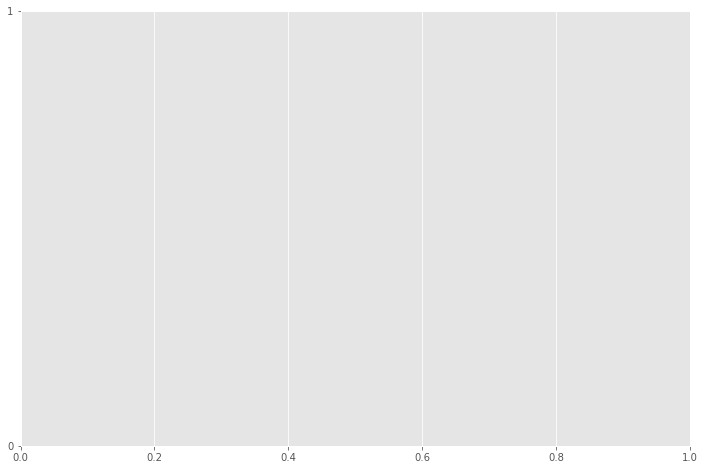

In [32]:
from matplotlib.ticker import MaxNLocator

#Force matplotlib to only display yaxis in integer format
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for col in numeric_cols:
    pass
    #df[col].plot(kind="box")

In [33]:
#df['ecology'].value_counts().plot(kind="bar")
for col in non_numeric_cols:
    pass
    #df[col].value_counts().plot(kind="bar")

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [36]:
bool_series = df.duplicated(keep='first',subset=['timestamp', 'full_sq','life_sq','floor','build_year','num_room','price_doc'])
print(True in bool_series)

False


### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [12]:
import re 

new_df = df.copy()
for col in non_numeric_cols:
    new_df[col] = new_df[col].str.lower()
    new_df[col] = new_df[col].str.strip()
    re.sub('[^A-Za-z0-9]+', '', str(new_df[col]))
    print(new_df[col])

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object
0           investment
1           investment
2           investment
3           investment
4           investment
             ...      
30466       investment
30467       investment
30468    owneroccupier
30469       investment
30470       investment
Name: product_type, Length: 30471, dtype: object
0                    bibirevo
1           nagatinskij zaton
2              tekstil'shhiki
3                      mitino
4                   basmannoe
                 ...         
30466                otradnoe
30467                tverskoe
30468    poselenie vnukovskoe
30469            obruchevskoe
30470             novogireevo
Name: sub_area, Length: 30471, dtype: object
0         no
1        yes
2         no
3         no
4    

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [8]:

"""
Dados nominais que indicavam uma condição booleana 'sim' ou 'não', foi substituido
por 1 e 0 respectivamente. Já os que representavam qualidade, foi substituido por uma 
escala, que vai de 0 a 4.

As datas foram convertidas em datetime e depois extraido os valores

O restante dos dados foram substituidos usando a funcao de hash
"""
new_df = df_non_numeric.copy()
new_df.replace(['no','yes'],[0,1],inplace=True)
new_df.replace(['no data','poor', 'satisfactory','good','excellent'],[0,1,2,3,4],inplace=True)
new_df.replace(['Investment','OwnerOccupier'],[1,0],inplace=True)
new_df['sub_area'] = list(map(lambda x: hash(x), new_df['sub_area']))
new_df['timestamp'] = list(map(lambda x: pd.to_datetime(x).value, new_df['timestamp']))
new_df['timestamp'] = list(map(lambda x: hash(x), new_df['timestamp']))
"""for col in new_df:
    print('------ df ------')
    print(df[col])
    print('------ new_df-----')
    print(new_df[col])
    print('\n')"""

"for col in new_df:\n    print('------ df ------')\n    print(df[col])\n    print('------ new_df-----')\n    print(new_df[col])\n    print('\n')"

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

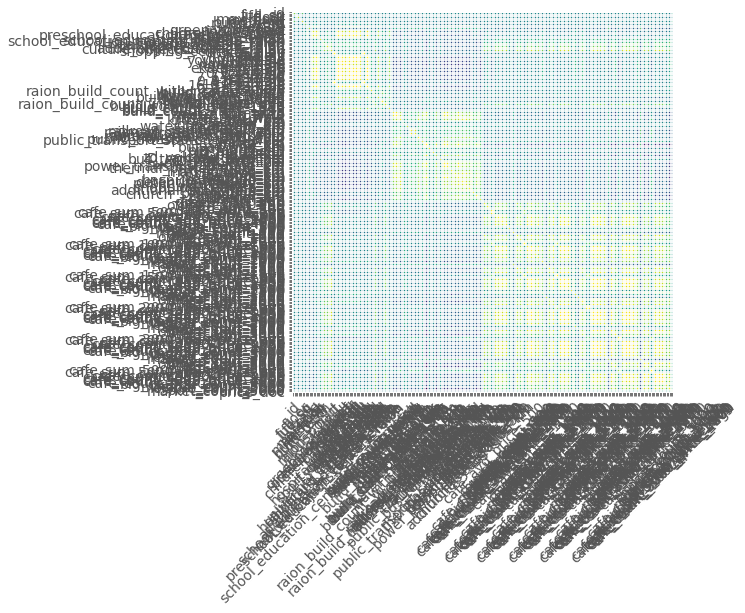

In [5]:

corr = df.corr()
plt.figure(figsize=(7,7))
plt.imshow(corr)
plt.xticks(np.arange(len(corr.columns)), corr.columns, fontsize=14, rotation=45 )
plt.yticks(np.arange(len(corr.index)), corr.index, fontsize=14 )
plt.show()
